# **Diabetes Prediction using Machine Learning Algorithms**

## Importing libraries and dataset

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')

## Exploratory Data Analysis

In [ ]:
dataset.head()   #Printing the 1st 5 rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.tail()   #Display the bottom 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataset.shape   #No of rows and columns in this dataset (rows, columns)

(768, 9)

In [ ]:
dataset.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T   #Getting statistical measures of the data

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
dataset['Outcome'].value_counts()
# How many examples are there for diabetes and non-diabetes patients
# 0 ---> non-diabetes
# 1 ---> diabetes

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
dataset.groupby('Outcome').mean()  #Calculate mean values for all attributes for diabetes and non-diabetes patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# Checking the data types and missing values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Visualization before preprocessing

Heatmap for the uncleaned data

<Axes: >

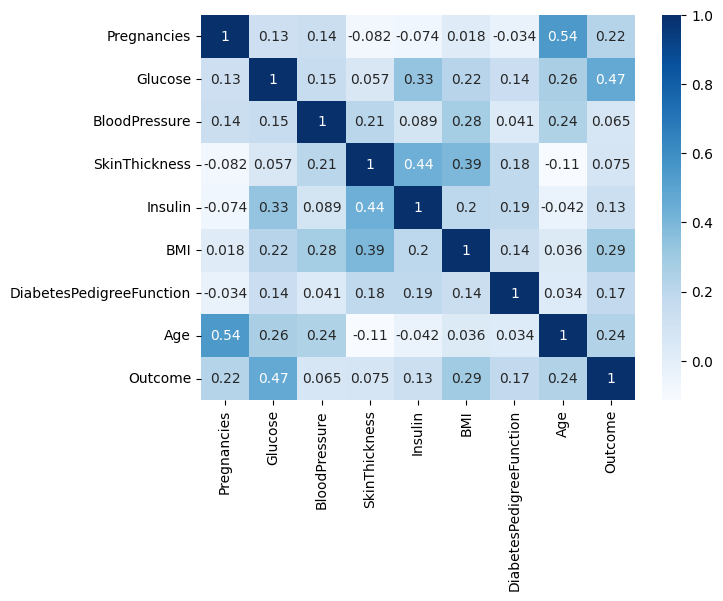

In [ ]:
#Exploring data to know relation before processing

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(),cmap='Blues',annot=True)

Histograms of each feature

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

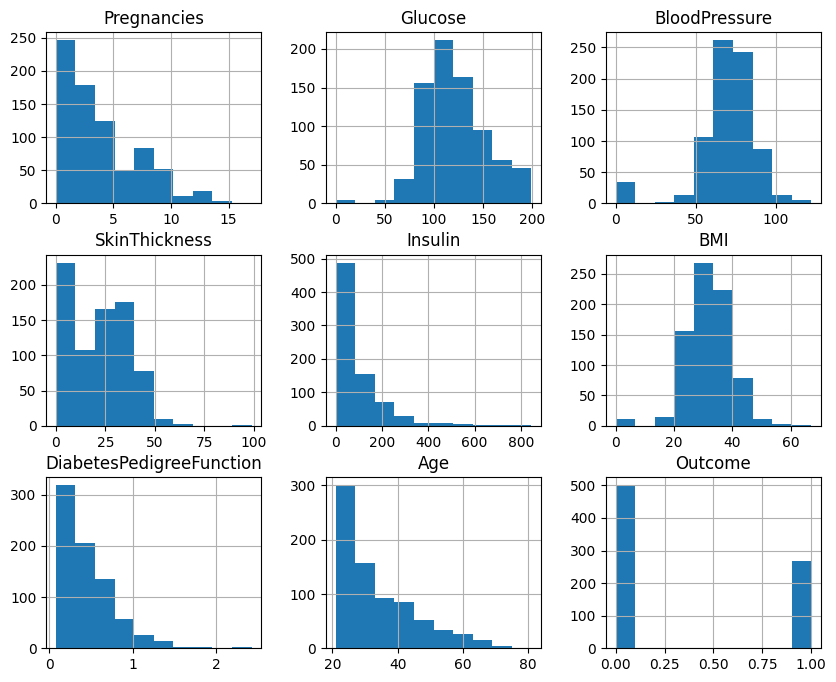

In [ ]:
# see how the data is distributed.
dataset.hist(figsize = (10,8))

Pairplot for the dataset before preprocessing

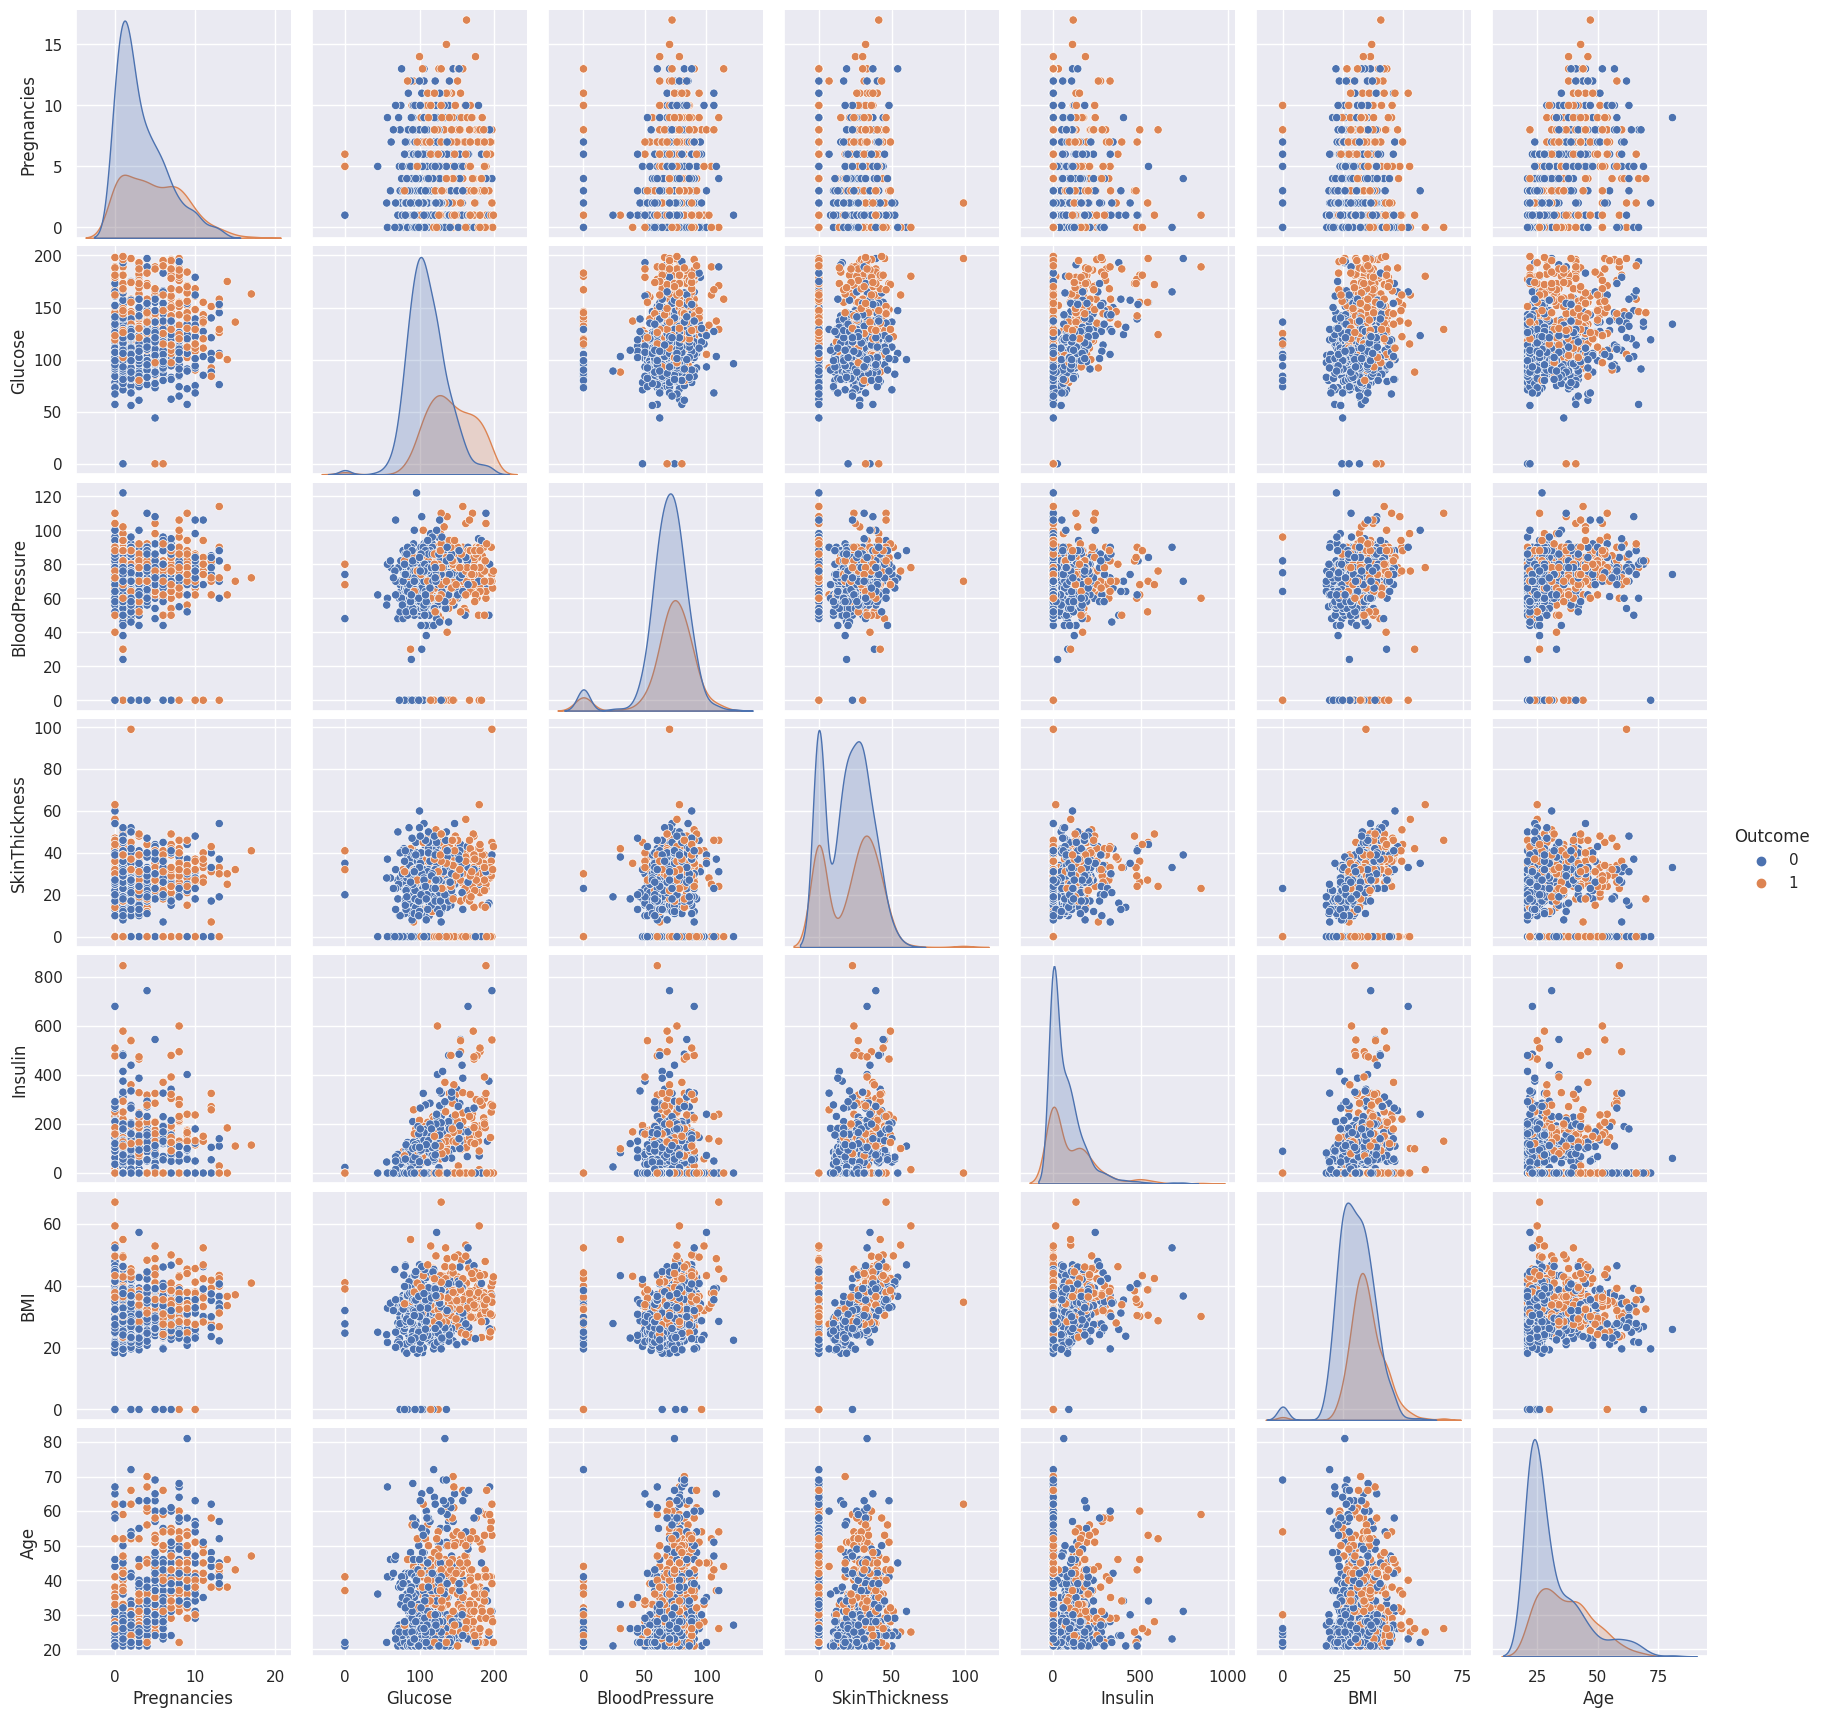

In [ ]:
graph = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','Outcome']
sns.set()
print(sns.pairplot(dataset[graph],hue='Outcome', diag_kind='kde'))


## Pre-Processing the Dataset

In [ ]:
# identify and remove columns from the dataset that have a high percentage (greater than 30%) of null values

col_num=0
TotalObjects =dataset.shape[0]

for x in dataset:
  nullCount =dataset[x].isnull().sum();
  nullPercent = nullCount*100 / (TotalObjects)
  if nullCount > 0 and nullPercent > 30 :
    col_num=col_num+1
    dataset.drop(x, axis=1,inplace=True)
    print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")

A total of 0 deleted !


In [ ]:
#Zeros or missing values will be replaced by the mean of that particular column

cols_clean = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
for i in cols_clean:
    dataset[i] = dataset[i].replace(0,np.NaN)
    cols_mean = int(dataset[i].mean(skipna=True))
    dataset[i] = dataset[i].replace(np.NaN, cols_mean)

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Removing duplicates
dataset.drop_duplicates()   #drop duplicates if any

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [ ]:
#get the no of duplicates raws value
dataset.duplicated().sum()

0

Outlier detection and treatment

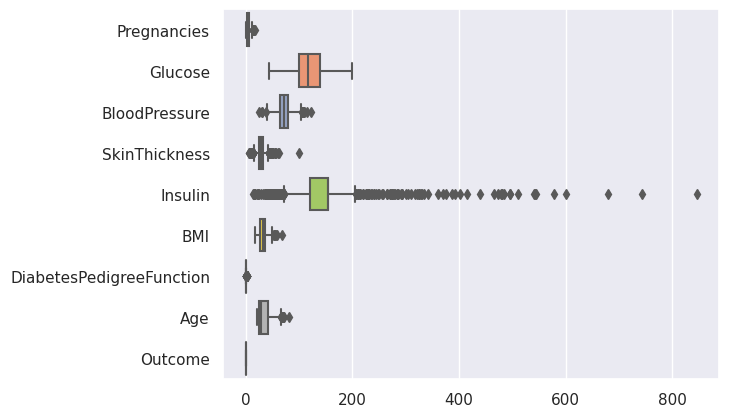

In [ ]:
#Checking the outliers of the columns

fig, axs = plt.subplots()
sns.boxplot(data=dataset, orient='h', palette='Set2')
plt.show()

In [ ]:
# Define the columns you want to check for outliers
columns_to_check = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']

# Define the threshold for identifying outliers (using the IQR method)
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers)

outlier_counts = {}   # Create a dictionary to store the count of outliers for each column

# Count outliers in each column
for col in columns_to_check:
    count = count_outliers(dataset, col)
    outlier_counts[col] = count

# Print the counts of outliers for each column
for col, count in outlier_counts.items():
    print(f"Column '{col}' has {count} outliers.")

total_outliers = sum(outlier_counts.values())   # Total number of outliers in the dataset
print(f"Total number of outliers in the dataset: {total_outliers}")


Column 'Pregnancies' has 14 outliers.
Column 'Glucose' has 0 outliers.
Column 'BloodPressure' has 14 outliers.
Column 'SkinThickness' has 87 outliers.
Column 'Insulin' has 168 outliers.
Column 'BMI' has 8 outliers.
Column 'DiabetesPedigreeFunction' has 29 outliers.
Column 'Age' has 9 outliers.
Total number of outliers in the dataset: 329


In [ ]:
#Calculates the lower and upper bounds for identifying outliers for a given numeric column in the DataFrame.

def outlier_thresholds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return  lower_bound,  upper_bound

In [ ]:
# Replaces outliers in numeric columns of the DataFrame with the calculated threshold values

def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(dataset, dataset.columns)

In [ ]:
# Checks if a given numeric column in the DataFrame contains outliers

def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    else:
        print(variable, " - no outliers")

for col in dataset.columns:
    has_outliers(dataset, col)

Pregnancies  - no outliers
Glucose  - no outliers
BloodPressure  - no outliers
SkinThickness  - no outliers
Insulin  - no outliers
BMI  - no outliers
DiabetesPedigreeFunction  - no outliers
Age  - no outliers
Outcome  - no outliers


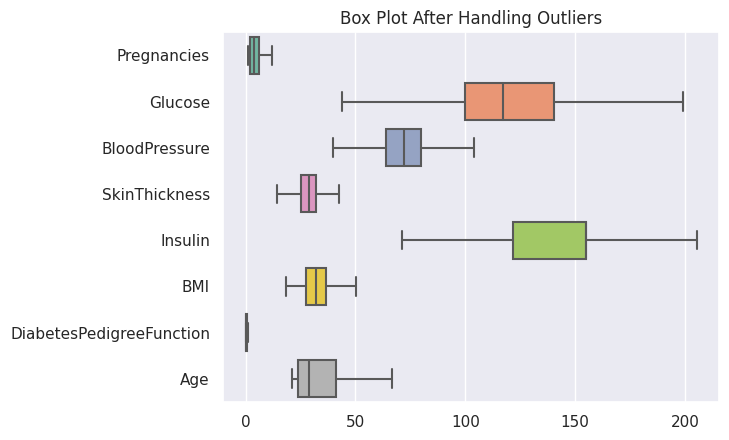

In [ ]:
# Create a box plot to visualize the data after handling outliers
fig, axs = plt.subplots()
sns.boxplot(data=dataset[columns_to_check], orient='h', palette='Set2')
plt.title("Box Plot After Handling Outliers")
plt.show()

In [ ]:
# Data Standardization (Getting data in same range)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(dataset)
print(standardized_data)

[[ 0.55496153  0.86525364 -0.03063207 ...  0.58892732  1.44569096
   1.36589591]
 [-1.17338581 -1.20601255 -0.54391414 ... -0.37810147 -0.189304
  -0.73212021]
 [ 1.24630046  2.01595708 -0.71500816 ...  0.74659506 -0.10325164
   1.36589591]
 ...
 [ 0.20929206 -0.02243187 -0.03063207 ... -0.74949659 -0.27535637
  -0.73212021]
 [-1.17338581  0.14195434 -1.05719621 ... -0.38510892  1.18753386
   1.36589591]
 [-1.17338581 -0.94299462 -0.20172609 ... -0.50423566 -0.87772293
  -0.73212021]]


In [49]:
# Seperating the data and labels

X = dataset.drop("Outcome",axis=1)
Y = dataset["Outcome"]

Saving the preprocessed data into a csv file

In [50]:
# Create a DataFrame using preprocessed dataset X
dataset_new = pd.DataFrame(dataset)

# Specify the file path where you want to save the CSV file
file_path = '/content/dataset_new.csv'

# Use the to_csv method to save the DataFrame as a CSV file
dataset_new.to_csv(file_path, index=False)

## Data modeling

In [ ]:
# Spliting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## K-Nearest Neighbors Algorithm

Building and Training the KNN Model

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize variables to store best accuracy and corresponding k
best_accuracy = 0
best_k = 0

for k in list(range(1, 10)):
    # Create a KNN model with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k,p=2,metric='euclidean')
    knn.fit(X_train,Y_train)

    # Perform cross-validation with 5 folds
    scores = cross_val_score(knn, X_train, Y_train, cv=5)

    # Calculate the mean accuracy
    accuracy = scores.mean()

    # Check if this accuracy is better than the previous best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Print the best 'k' and corresponding accuracy
print(f'Best k: {best_k}')
print(f'Accuracy with best k: {best_accuracy:.2f}')

Best k: 9
Accuracy with best k: 0.75


Evaluating the Model

In [ ]:
# Predict on the test data
X_test_prediction = knn.predict(X_test)
knn_accuracy = accuracy_score(X_test_prediction, Y_test)

# Classification Report
confusion = confusion_matrix(Y_test, X_test_prediction)
report = classification_report(Y_test, X_test_prediction)

print(f'Accuracy: {knn_accuracy:.2f} for Best k: {best_k}')
print(f'-------------------------------------------')
print('Classification Report:\n\n', report)
print('Confusion matrix:\n\n', confusion)

Accuracy: 0.71 for Best k: 9
-------------------------------------------
Classification Report:

               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       100
         1.0       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Confusion matrix:

 [[82 18]
 [26 28]]


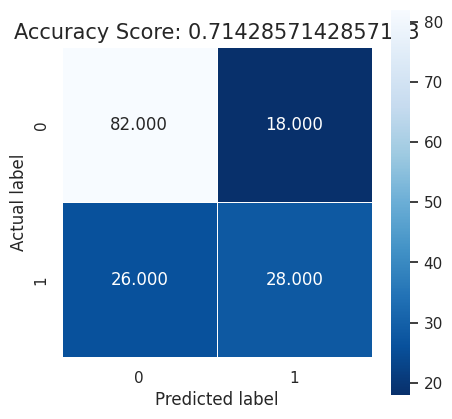

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

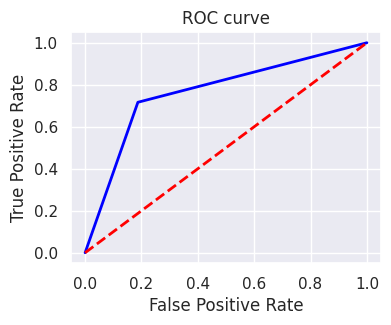

In [ ]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

false_pr, true_pr,_=roc_curve(knn.predict(X_train),Y_train,drop_intermediate=False)
plt.figure(figsize=(4,3))

##Creating the ROC,
plt.plot(false_pr, true_pr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Logistic Regression

Building and Training the model

In [ ]:
# Create a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)

# Training the Logistic Regression Classifier
classifier.fit(X_train, Y_train)

# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.7817589576547231


Evaluating the model

In [ ]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
lg_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data:', lg_accuracy)

# Classification Report
confusion = confusion_matrix(Y_test, X_test_prediction)
report = classification_report(Y_test,X_test_prediction)
print(f'-------------------------------------------')
print('Classification Report:\n\n', report)
print('Confusion matrix:\n\n', confusion)

Accuracy score of the test data: 0.7337662337662337
-------------------------------------------
Classification Report:

               precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       100
         1.0       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154

Confusion matrix:

 [[87 13]
 [28 26]]


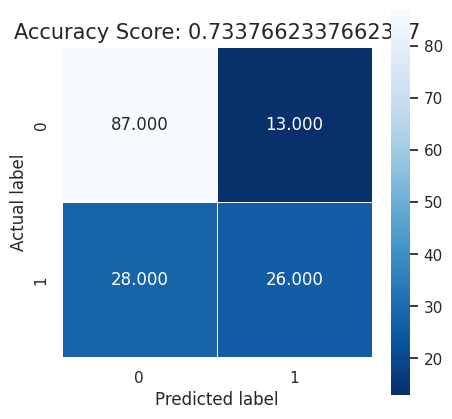

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

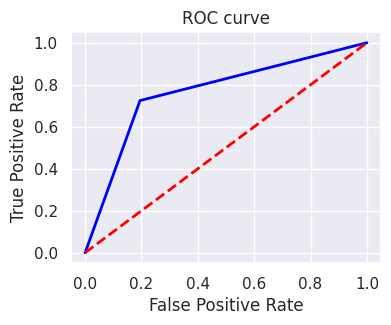

In [ ]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

false_pr, true_pr,_=roc_curve(classifier.predict(X_train),Y_train,drop_intermediate=False)
plt.figure(figsize=(4,3))

##Creating the ROC,
plt.plot(false_pr, true_pr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Support Vector Machine

Building and Training the model

In [ ]:
# Create an SVM classifier with a linear kernel
svm_classifier = svm.SVC(kernel='linear', probability=True)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Accuracy score on the training data
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.7801302931596091


Evaluating the model

In [ ]:
# Accuracy score on the test data
X_test_prediction = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data:',svm_accuracy)

# Classification Report
report = classification_report(Y_test,X_test_prediction)
confusion = confusion_matrix(Y_test, X_test_prediction)
print(f'-------------------------------------------')
print('Classification Report:\n\n', report)
print('Confusion matrix:\n\n', confusion)

Accuracy score of the test data: 0.7532467532467533
-------------------------------------------
Classification Report:

               precision    recall  f1-score   support

         0.0       0.76      0.90      0.83       100
         1.0       0.72      0.48      0.58        54

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154

Confusion matrix:

 [[90 10]
 [28 26]]


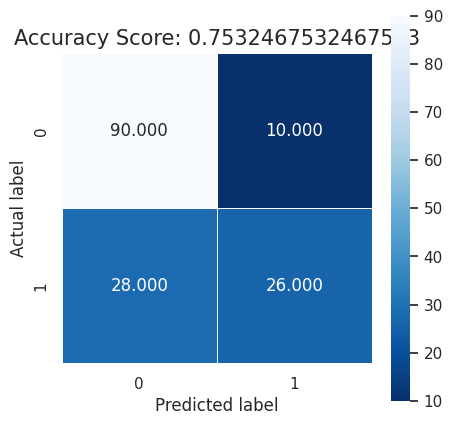

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm_classifier.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

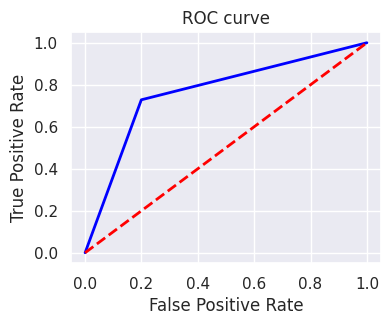

In [ ]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

false_pr, true_pr,_=roc_curve(svm_classifier.predict(X_train),Y_train,drop_intermediate=False)
plt.figure(figsize=(4,3))

##Creating the ROC,
plt.plot(false_pr, true_pr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Random Forest

Building and Training the model

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators= 10 , max_depth=5 , random_state=0)

# Training the Random Forest Classifier
rf.fit(X_train, Y_train)

# Accuracy score on the training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.8485342019543974


Evaluating the model

In [ ]:
# Accuracy score on the test data
X_test_prediction = rf.predict(X_test)
rf_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data:', rf_accuracy)

# Classification Report
confusion = confusion_matrix(Y_test, X_test_prediction)
report = classification_report(Y_test,X_test_prediction)
print(f'-------------------------------------------')
print('Classification Report:\n\n', report)
print('Confusion matrix:\n\n', confusion)
print('\nPrediction:\n\n', X_test_prediction)

Accuracy score of the test data: 0.7727272727272727
-------------------------------------------
Classification Report:

               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       100
         1.0       0.73      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

Confusion matrix:

 [[89 11]
 [24 30]]

Prediction:

 [0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]


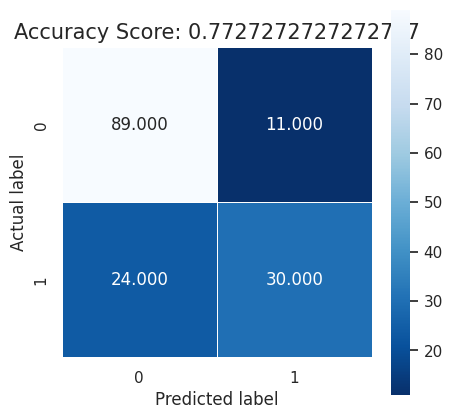

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

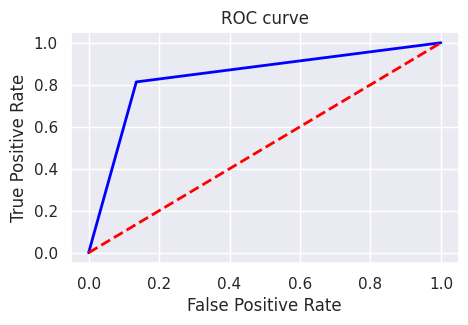

In [ ]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

false_pr, true_pr,_=roc_curve(rf.predict(X_train),Y_train,drop_intermediate=False)
plt.figure(figsize=(5,3))

##Creating the ROC,
plt.plot(false_pr, true_pr, color='blue',lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Optimizing the best model

Comparing models

In [ ]:
# Accuracy on test set
print("K Nearest neighbors: " + str(knn_accuracy * 100))
print("Logistic Regression: " + str(lg_accuracy * 100))
print("Support Vector Classifier: " + str(svm_accuracy * 100))
print("Random Forest: " + str(rf_accuracy * 100))

# Create a dictionary to store model accuracies
model_accuracies = {
    "K Nearest Neighbors": knn_accuracy,
    "Logistic Regression": lg_accuracy,
    "Support Vector Classifier": svm_accuracy,
    "Random Forest": rf_accuracy
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Print the best model and its accuracy
print("\nBest Model:", best_model)
print("Best Accuracy:", best_accuracy * 100)

K Nearest neighbors: 71.42857142857143
Logistic Regression: 73.37662337662337
Support Vector Classifier: 75.32467532467533
Random Forest: 77.27272727272727

Best Model: Random Forest
Best Accuracy: 77.27272727272727


After calculating the accuracy of each model, it has been determined that the 'Random Forest algorithm' for classification consistently achieved the highest level of accuracy among the alternatives. Therefore Random Forest algorithm was chosen for further activities.

Tuning the Random Forest model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=123)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions on the test data using the best model
X_test_prediction = best_rf.predict(X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Best Parameters:', best_params)
print('Accuracy score of the test data with the best model:', rf_accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy score of the test data with the best model: 0.7792207792207793


## Data Visualization

Feature importances barplot for the Random Forest model

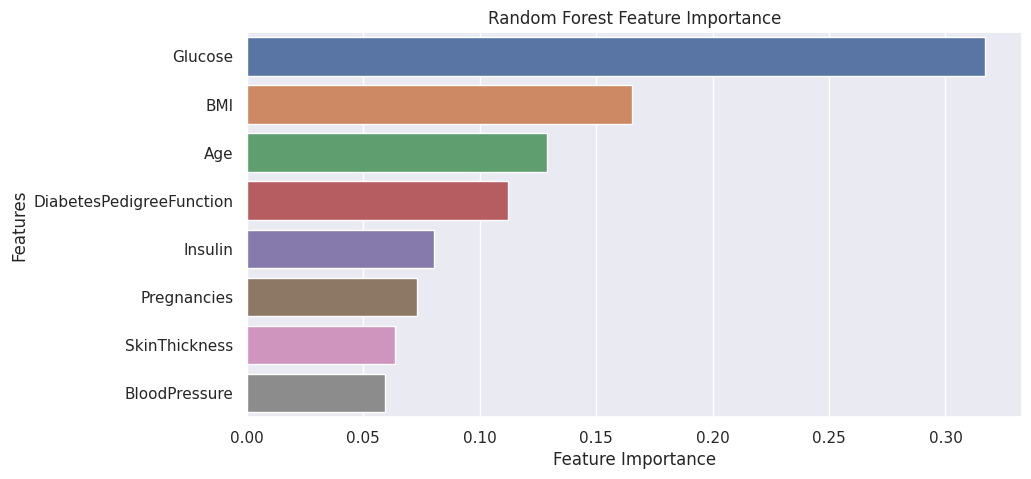

In [52]:
# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

Heatmap for the cleaned data

In [ ]:
plt.figure(figsize=(7,5))
p=sns.heatmap(X.corr(), annot=True,cmap ='RdYlGn')

Histogram for the preprocessed data

In [ ]:
# see how the data is distributed.
X.hist(figsize = (10,8))

In [53]:
# Data Standardization (Getting data in same range)

scaler.fit(X)
standardized_data = scaler.transform(X)

#Making a prediction system

input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array
input_data_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped =input_data_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

print('-----------------------------------------------------')
print('-----------------------------------------------------')
prediction = best_rf.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

print('-----------------------------------------------------')
print('-----------------------------------------------------')

[[-0.13637741 -0.38408152  1.68030817 -3.88121179 -3.68283222  0.78203738
  -0.93869787 -0.27535637]]
-----------------------------------------------------
-----------------------------------------------------
[0.]
The person is not diabetic
-----------------------------------------------------
-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
#Saving the trained model
import pickle

In [58]:
filename = 'diabetes_model'
pickle.dump(best_rf, open(filename, 'wb'))

In [59]:
#loading the saved model
loaded_model=pickle.load(open('diabetes_model', 'rb'))

In [60]:
#Making a prediction system

input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array
input_data_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped =input_data_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

print('-----------------------------------------------------')
print('-----------------------------------------------------')

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

print('-----------------------------------------------------')
print('-----------------------------------------------------')

[[-0.13637741 -0.38408152  1.68030817 -3.88121179 -3.68283222  0.78203738
  -0.93869787 -0.27535637]]
-----------------------------------------------------
-----------------------------------------------------
[0.]
The person is not diabetic
-----------------------------------------------------
-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
